载入训练数据...


载入完成，耗时8.958214秒
图片个数：42000，图片像素数目：784
载入测试数据...


载入完成，耗时5.614540秒


(33600, 784) (8400, 784)


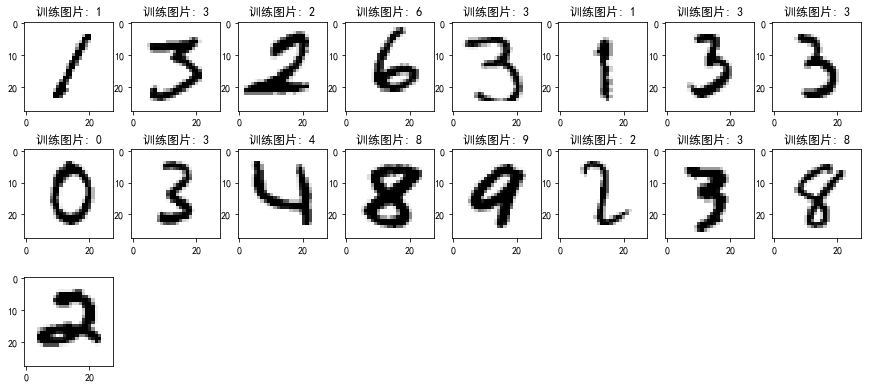

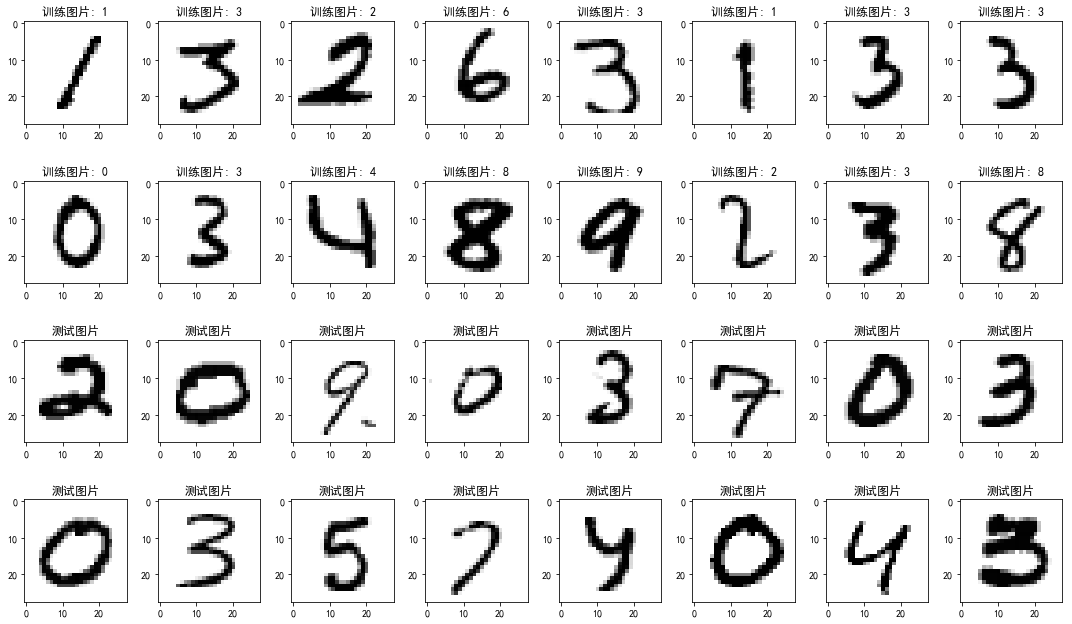

随机森林开始训练...


随机森林训练结束，耗时0分钟53.758秒
OOB准确率：95.821%


随机森林训练集准确率：100.000%，预测耗时：2秒


随机森林测试集准确率：96.512%，预测耗时：0秒
[2 6 0 7 8 7 0 7 5 0 2 2 9 3 9 8 2 8 7 0 4 9 3 9 2 8 9 7 4 4 1 5 8 7 5 3 2
 4 0 1 8 7 3 2 6 5 8 4 9 2 7 8 5 2 4 9 9 6 8 2 5 3 9 2 5 1 4 6 2 8 8 0 8 2
 2 1 9 8 4 9 3 3 2 8 7 6 8 9 7 3 5 3 1 2 3 9 9 3 9 8 4 4 7 8 3 3 7 3 4 4 0
 9 9 1 7 4 9 5 2 8 8 3 5 5 8 5 1 3 6 2 7 7 3 6 4 3 4 5 0 7 4 9 5 1 4 3 3 5
 8 7 9 2 0 8 3 3 2 6 5 9 9 9 8 1 3 7 1 5 5 3 4 1 2 9 5 2 8 3 1 4 4 3 2 8 3
 4 4 3 9 2 5 7 1 7 6 8 0 5 9 5 6 5 0 8 8 7 0 6 4 8 7 9 4 3 2 4 4 2 8 6 3 1
 9 2 9 6 2 8 9 5 8 4 4 0 0 2 2 6 9 7 9 4 5 0 6 2 3 6 5 9 9 9 2 5 2 9 9 8 8
 5 4 2 3 9 3 7 9 0 5 0 9 5 3 2 4 3 9 8 8 3 9 5 2 7 9 2 8 5 8 5 4 5 8]
[4 5 6 4 2 2 5 2 9 7 7 3 7 9 4 3 7 5 3 5 6 4 5 3 7 2 4 4 6 8 4 8 9 8 3 5 3
 0 5 8 2 3 8 9 0 6 9 8 5 3 3 2 9 1 9 8 5 5 3 7 3 5 4 3 6 8 2 4 3 1 3 3 5 3
 4 8 8 2 7 4 9 5 4 9 3 2 3 8 2 8 3 5 8 3 9 7 3 2 7 9 2 8 9 4 9 1 0 9 6 9 9
 4 4 7 9 9 4 8 7 3 5 5 9 3 6 9 8 5 4 7 5 3 5 5 9 9 9 3 2 5 8 4 6 8 9 5 9 0
 3 3 2 7 8 4 9 5 1 4 6 3 4 8 9 5 1 9 7 8 3 1 9 8 3 7 3 7 3 8 3 9 9 1 3 3 2
 9 

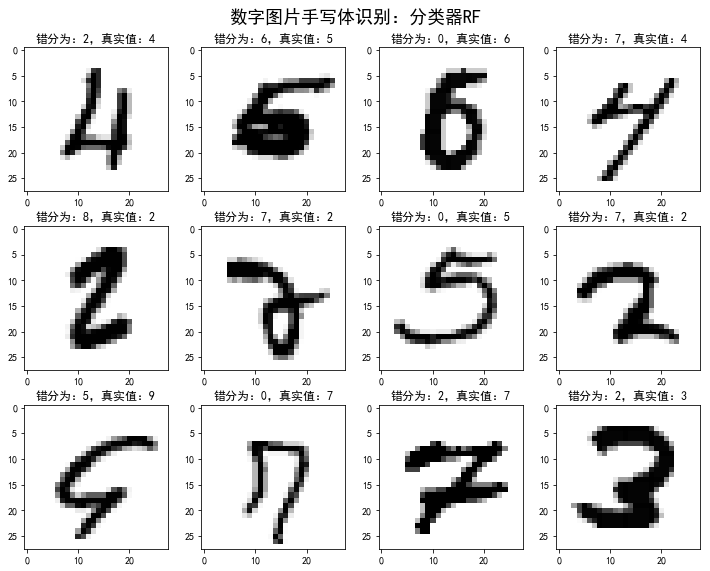

In [3]:
import numpy as np
from sklearn import svm
import matplotlib.colors
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from time import time

classifier_type = 'RF'

print('载入训练数据...')
t = time()
data = pd.read_csv('data/MNIST.train.csv', header=0, dtype=np.int)
print('载入完成，耗时%f秒' % (time() - t))
y = data['label'].values
x = data.values[:, 1:]
print('图片个数：%d，图片像素数目：%d' % x.shape)
images = x.reshape(-1, 28, 28)
y = y.ravel()

print('载入测试数据...')
t = time()
data_test = pd.read_csv('data/MNIST.test.csv', header=0, dtype=np.int)
data_test = data_test.values
images_test_result = data_test.reshape(-1, 28, 28)
print('载入完成，耗时%f秒' % (time() - t))

np.random.seed(0)
x, x_test, y, y_test = train_test_split(x, y, train_size=0.8, random_state=1)
images = x.reshape(-1, 28, 28)
images_test = x_test.reshape(-1, 28, 28)
print(x.shape, x_test.shape)

matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15, 9), facecolor='w')
for index, image in enumerate(images[:16]):
    plt.subplot(4, 8, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(u'训练图片: %i' % y[index])
for index, image in enumerate(images_test_result[:16]):
    plt.subplot(4, 8, index + 17)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(u'测试图片')
plt.tight_layout()
plt.show()

# 05SVM
if classifier_type == '05SVM':
    # params = {'C':np.logspace(1, 4, 4, base=10), 'gamma':np.logspace(-10, -2, 9, base=10)}
    # clf = svm.SVC(kernel='rbf')
    # model = GridSearchCV(clf, param_grid=params, cv=3)
    model = svm.SVC(C=1000, kernel='rbf', gamma=1e-10)
    print('SVM开始训练...')
    t = time()
    model.fit(x, y)
    t = time() - t
    print('SVM训练结束，耗时%d分钟%.3f秒' % (int(t/60), t - 60*int(t/60)))
    # print '最优分类器：', model.best_estimator_
    # print '最优参数：\t', model.best_params_
    # print 'model.cv_results_ ='
    # pprint(model.cv_results_)
    t = time()
    y_hat = model.predict(x)
    t = time() - t
    print('SVM训练集准确率：%.3f%%，耗时%d分钟%.3f秒' % (accuracy_score(y, y_hat)*100, int(t/60), t - 60*int(t/60)))
    t = time()
    y_test_hat = model.predict(x_test)
    t = time() - t
    print('SVM测试集准确率：%.3f%%，耗时%d分钟%.3f秒' % (accuracy_score(y_test, y_test_hat)*100, int(t/60), t - 60*int(t/60)))
    #save_result(model)
elif classifier_type == 'RF':
    rfc = RandomForestClassifier(100, criterion='gini', min_samples_split=2,
                                 min_impurity_split=1e-10, bootstrap=True, oob_score=True)
    print('随机森林开始训练...')
    t = time()
    rfc.fit(x, y)
    t = time() - t
    print('随机森林训练结束，耗时%d分钟%.3f秒' % (int(t/60), t - 60*int(t/60)))
    print('OOB准确率：%.3f%%' % (rfc.oob_score_*100))
    t = time()
    y_hat = rfc.predict(x)
    t = time() - t
    print('随机森林训练集准确率：%.3f%%，预测耗时：%d秒' % (accuracy_score(y, y_hat)*100, t))
    t = time()
    y_test_hat = rfc.predict(x_test)
    t = time() - t
    print('随机森林测试集准确率：%.3f%%，预测耗时：%d秒' % (accuracy_score(y_test, y_test_hat)*100, t))
    #save_result(rfc)

err = (y_test != y_test_hat)
err_images = images_test[err]
err_y_hat = y_test_hat[err]
err_y = y_test[err]
print(err_y_hat)
print(err_y)
plt.figure(figsize=(10, 8), facecolor='w')
for index, image in enumerate(err_images):
    if index >= 12:
        break
    plt.subplot(3, 4, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(u'错分为：%i，真实值：%i' % (err_y_hat[index], err_y[index]))
plt.suptitle(u'数字图片手写体识别：分类器%s' % classifier_type, fontsize=18)
plt.tight_layout(rect=(0, 0, 1, 0.95))
plt.show()

#3 SVM进行图片识别

Load Training File Start...


Load Test Data Start...


(1797, 1)
Load Data OK...


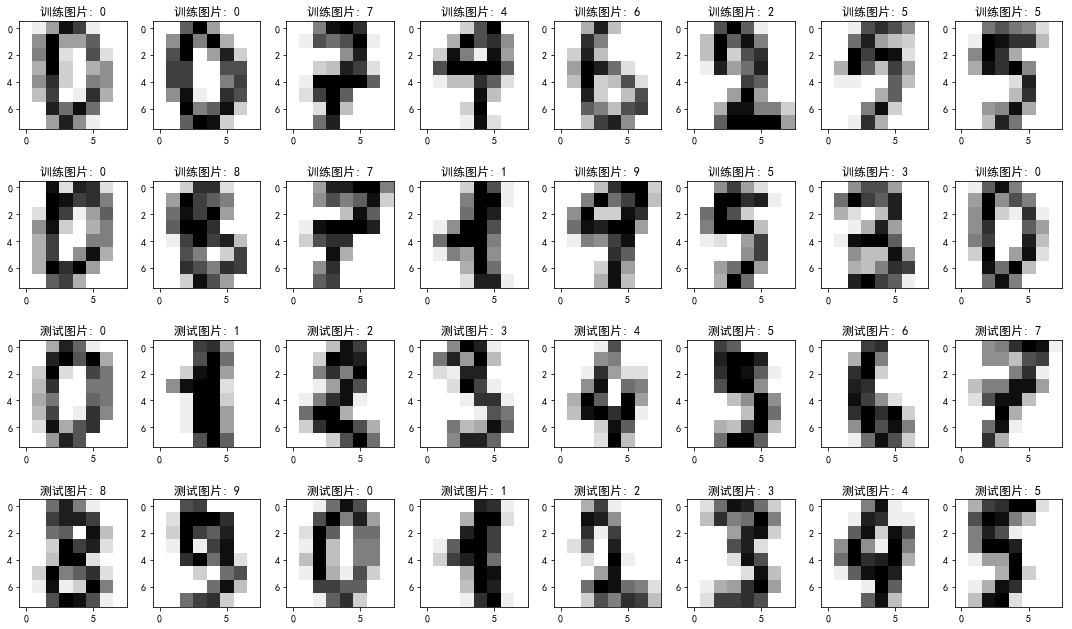

Start Learning...


训练+CV耗时：0分钟1.086秒
Learning is OK...


训练集准确率： 1.0


测试集准确率： 0.982749026155
[0 1 2 ..., 8 9 8]
[0 1 2 ..., 8 9 8]
[9 1 1 1 1 9 5 9 9 9 9 9 9 8 1 0 1 3 8 9 9 3 5 9 1 7 3 5 8 5 1]
[5 2 2 2 8 7 7 5 7 7 7 7 7 1 8 6 8 9 9 3 8 8 8 7 8 3 9 9 3 3 8]


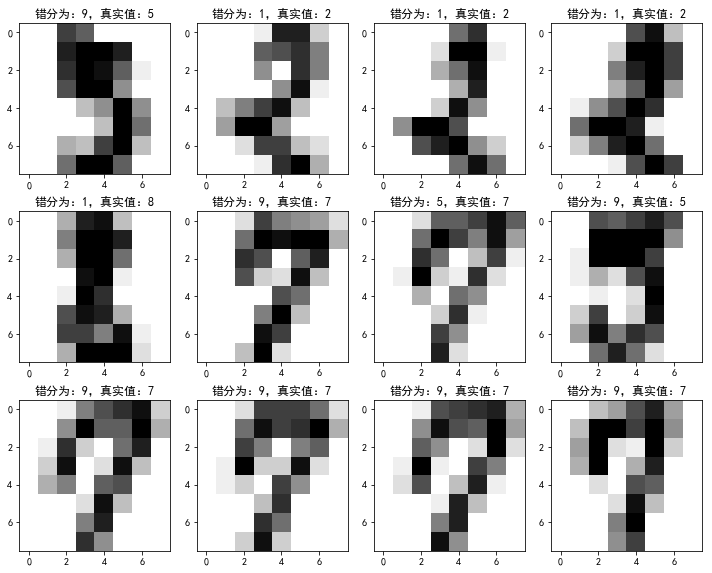

In [1]:
import numpy as np
from sklearn import svm
import matplotlib.colors
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from time import time

def show_accuracy(a, b, tip):
    acc = a.ravel() == b.ravel()
    print(tip + '正确率：%.2f%%' % (100*np.mean(acc)))

print('Load Training File Start...')
data = np.loadtxt('data/optdigits.tra', dtype=np.float, delimiter=',')
x, y = np.split(data, (-1, ), axis=1)
images = x.reshape(-1, 8, 8)
y = y.ravel().astype(np.int)

print('Load Test Data Start...')
data = np.loadtxt('data/optdigits.tes', dtype=np.float, delimiter=',')
x_test, y_test = np.split(data, (-1, ), axis=1)
print(y_test.shape)
images_test = x_test.reshape(-1, 8, 8)
y_test = y_test.ravel().astype(np.int)
print('Load Data OK...')

# x, x_test, y, y_test = train_test_split(x, y, test_size=0.4, random_state=1)
# images = x.reshape(-1, 8, 8)
# images_test = x_test.reshape(-1, 8, 8)

matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15, 9), facecolor='w')
for index, image in enumerate(images[:16]):
    plt.subplot(4, 8, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(u'训练图片: %i' % y[index])
for index, image in enumerate(images_test[:16]):
    plt.subplot(4, 8, index + 17)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(u'测试图片: %i' % y_test[index])
plt.tight_layout()
plt.show()

# params = {'C':np.logspace(0, 3, 7), 'gamma':np.logspace(-5, 0, 11)}
# model = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=params, cv=3)
model = svm.SVC(C=10, kernel='rbf', gamma=0.001)
print('Start Learning...')
t0 = time()
model.fit(x, y)
t1 = time()
t = t1 - t0
print('训练+CV耗时：%d分钟%.3f秒' % (int(t/60), t - 60*int(t/60)))
# print '最优参数：\t', model.best_params_
#clf.fit(x, y)
print('Learning is OK...')
print('训练集准确率：', accuracy_score(y, model.predict(x)))
y_hat = model.predict(x_test)
print('测试集准确率：', accuracy_score(y_test, model.predict(x_test)))
print(y_hat)
print(y_test)

err_images = images_test[y_test != y_hat]
err_y_hat = y_hat[y_test != y_hat]
err_y = y_test[y_test != y_hat]
print(err_y_hat)
print(err_y)
plt.figure(figsize=(10, 8), facecolor='w')
for index, image in enumerate(err_images):
    if index >= 12:
        break
    plt.subplot(3, 4, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(u'错分为：%i，真实值：%i' % (err_y_hat[index], err_y[index]))
plt.tight_layout()
plt.show()